## 예제
1. csv 폴더에서 4개의 파일을 로드 (tran_1, tran_2, tran_d_1, tran_d_2)
2. tran_1과 tran_2는 단순한 행 추가 결합 (유니언 결합)
3. tran_d_1과 tran_2_d도 유니언 결합
4. 2번, 3번 과정에서 나온 데이터프레임을 특정 조건에 맞춰서 2번 데이터프레임을 기준으로 열 추가 결합(조인 결합)
5. csv 폴더에 있는 2개의 파일을 로드 (custom_master, item_master)
6. 4번 과정에서 나온 데이터프레임과 custom_master 조인 결합
7. 6번 과정에서 나온 데이터프레임과 item_master 조인 결합
8. 결합이 된 데이터프레임에서 quantity 컬럼과 item_price 컬럼의 데이터를 가지고 total_price 라는 파생변수를 생성 (total_price = item_price * quantity)

In [207]:
import pandas as pd
import os

In [208]:
# csv 폴더에서 4개의 파일 로드
tran_1 = pd.read_csv('../csv/tran_1.csv')
tran_2 = pd.read_csv('../csv/tran_2.csv')
tran_d_1 = pd.read_csv('../csv/tran_d_1.csv')
tran_d_2 = pd.read_csv('../csv/tran_d_2.csv')

In [209]:
# tran_1과 tran_2 단순 행 결합 (유니언 결합)
df = pd.concat([tran_1, tran_2], axis=0, ignore_index=True)
# df.info()

In [210]:
# tran_d_1과 tran_d_2 유니언 결합
df2 = pd.concat([tran_d_1, tran_d_2], axis=0, ignore_index=True)
# df2.info()

In [211]:
# 조인 결합
df3 = pd.merge(df, df2, on = 'transaction_id', how = 'inner')

In [212]:
# 파일 로드
c_master = pd.read_csv('../csv/customer_master.csv')
i_master = pd.read_csv('../csv/item_master.csv')

In [213]:
# 조인 결합
df4 = pd.merge(df3, c_master, on = 'customer_id', how = 'inner')

In [214]:
# 조인 결합
df5 = pd.merge(df4, i_master, on = 'item_id', how = 'inner')

In [215]:
# total_price 라는 파생변수 생성
df5['total_price'] = df5['item_price'] * df5['quantity']
df5.head(5)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,210000
1,T0000003439,420000,2019-04-30 02:39:00,HD298120,3494,S005,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0,PC-E,210000,210000
2,T0000003439,420000,2019-04-30 02:39:00,HD298120,3495,S005,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0,PC-E,210000,210000
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0,PC-E,210000,210000
4,T0000000832,210000,2019-02-19 19:48:24,IK452215,753,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0,PC-E,210000,210000


In [216]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6069 entries, 0 to 6068
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  6069 non-null   object
 1   price           6069 non-null   int64 
 2   payment_date    6069 non-null   object
 3   customer_id     6069 non-null   object
 4   detail_id       6069 non-null   int64 
 5   item_id         6069 non-null   object
 6   quantity        6069 non-null   int64 
 7   name            6069 non-null   object
 8   class           6069 non-null   object
 9   gender          6069 non-null   object
 10  start_date      6069 non-null   object
 11  end_date        1978 non-null   object
 12  campaign_id     6069 non-null   object
 13  is_deleted      6069 non-null   int64 
 14  item_name       6069 non-null   object
 15  item_price      6069 non-null   int64 
 16  total_price     6069 non-null   int64 
dtypes: int64(6), object(11)
memory usage: 853.5+ KB


In [217]:
df5['item_name'].value_counts('total_price')

PC-A    0.300379
PC-E    0.250783
PC-B    0.199044
PC-C    0.131158
PC-D    0.118636
Name: item_name, dtype: float64

In [218]:
# item_name 별 total_price의 총합 출력
group_data = df5[['item_name', 'total_price']].groupby('item_name').sum()

In [219]:
# 내림차순 정렬
item_rank = group_data.sort_values('total_price', ascending=False)

In [220]:
# 가장 높은 합을 가진 item_name 출력
item_rank.iloc[[0]]

,total_price
item_name,
PC-E,326130000


In [221]:
df5['gender']

0       M
1       F
2       F
3       M
4       M
       ..
6064    M
6065    M
6066    M
6067    M
6068    M
Name: gender, Length: 6069, dtype: object

In [222]:
origin_data = df5.copy()

In [223]:
# M을 남자로 F를 여자로 변환
# loc를 이용
df5.loc[df5['gender'] == 'M', 'gender'] = '남자'
df5.loc[df5['gender'] == 'F', 'gender'] = '여자'

In [224]:
df5['gender'].value_counts()

남자    3268
여자    2801
Name: gender, dtype: int64

In [225]:
df5 = origin_data.copy()

In [226]:
df5['gender'].value_counts()

M    3268
F    2801
Name: gender, dtype: int64

In [227]:
# apply를 사용
def change (x):
    # x에는 m아니면 f
    if x == 'F':
        result = '여자'
    else:
        result = '남자'
    return result

df5['gender'].apply(change)

0       남자
1       여자
2       여자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [228]:
# lambda 사용(if문을 한줄로 처리) --> elif 대신에 else뒤에 다시 if문 반복
df5['gender'].apply(lambda x : '남자' if (x == 'M') else ('여자' if (x =='F') else '무응답')) 

0       남자
1       여자
2       여자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [229]:
# payment_date 시계열 데이터로 변경
df5['payment_date'] = pd.to_datetime(df5['payment_date'], format = '%Y-%m-%d %H:%M:%S')
df5['payment_date']

0      2019-02-01 01:36:57
1      2019-04-30 02:39:00
2      2019-04-30 02:39:00
3      2019-02-01 02:47:23
4      2019-02-19 19:48:24
               ...        
6064   2019-07-26 04:57:13
6065   2019-07-28 10:14:39
6066   2019-07-28 11:23:32
6067   2019-07-30 11:08:09
6068   2019-07-31 20:25:02
Name: payment_date, Length: 6069, dtype: datetime64[ns]

In [230]:
# 시계열 데이터에서 (년/월) 추출해서 새로운 파생변수 payment_month (월/년)생성
df5['payment_month'] = df5['payment_date'].dt.strftime('%m-%Y')
df5.head(5)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,210000,02-2019
1,T0000003439,420000,2019-04-30 02:39:00,HD298120,3494,S005,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0,PC-E,210000,210000,04-2019
2,T0000003439,420000,2019-04-30 02:39:00,HD298120,3495,S005,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0,PC-E,210000,210000,04-2019
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0,PC-E,210000,210000,02-2019
4,T0000000832,210000,2019-02-19 19:48:24,IK452215,753,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0,PC-E,210000,210000,02-2019


In [253]:
# 월별 거래량 확인
df6 = df5[['payment_month', 'total_price']].groupby('payment_month').agg(['mean', 'sum'])

In [254]:
df6

total_price           
                        mean        sum
payment_month                          
02-2019        137592.964824  136905000
03-2019        135154.382470  135695000
04-2019        136106.106106  135970000
05-2019        133551.307847  132750000
06-2019        135747.800587  138870000
07-2019        138377.609108  145850000

<Axes: xlabel='payment_month'>

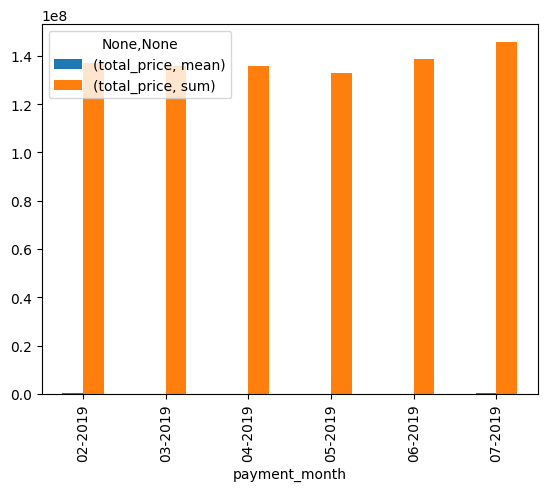

In [255]:
df6.plot.bar()

In [256]:
pivot_data = pd.pivot_table(
    df5,
    index = 'payment_month',
    aggfunc = ['sum', 'mean', 'min', 'max', 'std'],
    values = 'total_price'
)

<Axes: xlabel='payment_month'>

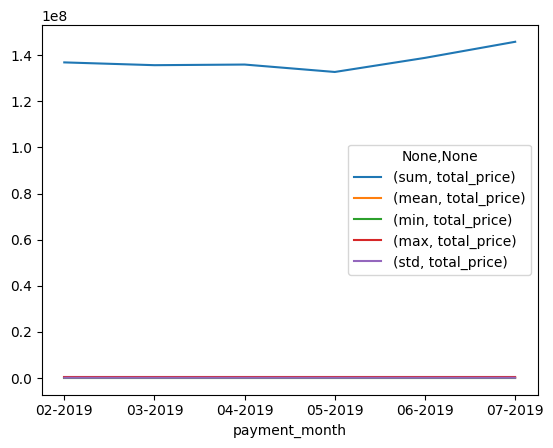

In [259]:
pivot_data.plot()